In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("ETH-USD.csv",parse_dates=True)

In [39]:
df = df.drop(columns=['Adj Close'])

In [40]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0


In [41]:
df.describe()

,Open,High,Low,Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,398.054460,413.880550,380.314871,399.066543,7.125412e+09
std,618.185352,646.694116,585.147027,619.488385,1.065180e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,13.864300,14.373900,13.254300,13.883900,3.911200e+07
50%,200.608871,206.361450,194.783997,200.634995,2.201160e+09
75%,391.488617,405.616364,381.273834,392.189972,9.818257e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,8.448291e+10


In [42]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [43]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()

In [44]:
df

,Date,Open,High,Low,Close,Volume,100ma
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...,...
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,1.749548e+10,2543.801423
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,1.620039e+10,2540.698140
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,1.605745e+10,2537.399165
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,1.456648e+10,2534.993437


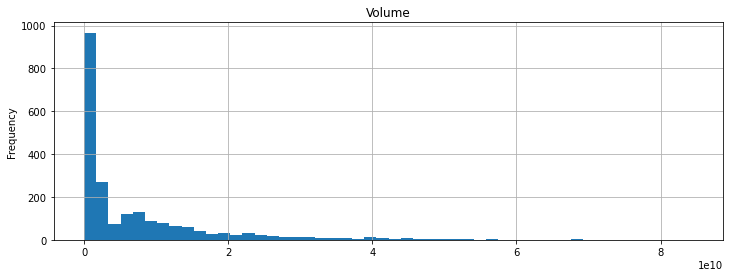

In [45]:
plt.figure(figsize=(12,4))
df.Volume.plot(kind='hist', bins=50)
plt.title('Volume')
plt.grid()
plt.show()

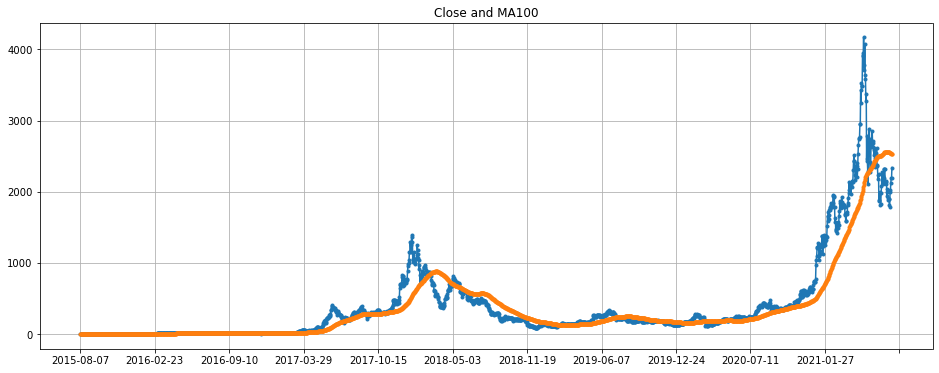

In [46]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close, marker='.')
ax.plot(df.Date, df['100ma'], marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.title('Close and MA100')
plt.grid()
plt.show()